In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('../data/super_loc.csv')
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Duration,lng,lat
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3,-87.533344,37.815369
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,-87.533344,37.815369
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,-118.349755,34.069966
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,-80.165442,26.145383
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,-80.165442,26.145383


- Order Date와 Ship Date의 요일 컬럼 생성

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           9800 non-null   object 
 1   Order Date         9800 non-null   object 
 2   Ship Date          9800 non-null   object 
 3   Ship Mode          9800 non-null   object 
 4   Customer ID        9800 non-null   object 
 5   Segment            9800 non-null   object 
 6   Country            9800 non-null   object 
 7   City               9800 non-null   object 
 8   State              9800 non-null   object 
 9   Postal Code        9800 non-null   int64  
 10  Region             9800 non-null   object 
 11  Product ID         9800 non-null   object 
 12  Category           9800 non-null   object 
 13  Sub-Category       9800 non-null   object 
 14  Product Name       9800 non-null   object 
 15  Sales              9800 non-null   float64
 16  Shipping Duration  9800 

In [6]:
data['Order Date']=pd.to_datetime(data['Order Date'])
data['Ship Date']=pd.to_datetime(data['Ship Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           9800 non-null   object        
 1   Order Date         9800 non-null   datetime64[ns]
 2   Ship Date          9800 non-null   datetime64[ns]
 3   Ship Mode          9800 non-null   object        
 4   Customer ID        9800 non-null   object        
 5   Segment            9800 non-null   object        
 6   Country            9800 non-null   object        
 7   City               9800 non-null   object        
 8   State              9800 non-null   object        
 9   Postal Code        9800 non-null   int64         
 10  Region             9800 non-null   object        
 11  Product ID         9800 non-null   object        
 12  Category           9800 non-null   object        
 13  Sub-Category       9800 non-null   object        
 14  Product 

In [7]:
len(data[data['Ship Mode']=='Same Day'])

538

In [8]:
print(data.loc[data['Ship Mode']=='Same Day', 'Shipping Duration'].mean())
print(data.loc[data['Ship Mode']=='First Class', 'Shipping Duration'].mean())
print(data.loc[data['Ship Mode']=='Second Class', 'Shipping Duration'].mean())
print(data.loc[data['Ship Mode']=='Standard Class', 'Shipping Duration'].mean())

0.04460966542750929
2.179213857428381
3.2492113564668768
5.008363201911589


In [9]:
ship_mode = ['Same Day', 'First Class', 'Second Class', 'Standard Class']
region = data['Region'].unique().tolist()
state = data['State'].unique().tolist()

In [10]:
for mode in ship_mode:
    for r in region:
        mean_duration = data.loc[(data['Region']==r) & (data['Ship Mode']==mode), 'Shipping Duration'].mean()
        print(f"{r}, {mode}: {mean_duration:.2f}")

South, Same Day: 0.01
West, Same Day: 0.10
Central, Same Day: 0.03
East, Same Day: 0.00
South, First Class: 2.12
West, First Class: 2.10
Central, First Class: 2.31
East, First Class: 2.21
South, Second Class: 3.20
West, Second Class: 3.17
Central, Second Class: 3.36
East, Second Class: 3.27
South, Standard Class: 5.01
West, Standard Class: 5.07
Central, Standard Class: 4.98
East, Standard Class: 4.97


In [11]:
for mode in ship_mode:
    for s in state:
        mean_duration = data.loc[(data['State']==s) & (data['Ship Mode']==mode), 'Shipping Duration'].mean()
        print(f"{s}, {mode}: {mean_duration:.2f}")

Kentucky, Same Day: 0.00
California, Same Day: 0.09
Florida, Same Day: 0.00
North Carolina, Same Day: 0.07
Washington, Same Day: 0.13
Texas, Same Day: 0.08
Wisconsin, Same Day: 0.00
Utah, Same Day: 0.00
Nebraska, Same Day: 0.00
Pennsylvania, Same Day: 0.00
Illinois, Same Day: 0.00
Minnesota, Same Day: 0.00
Michigan, Same Day: 0.00
Delaware, Same Day: 0.00
Indiana, Same Day: 0.00
New York, Same Day: 0.00
Arizona, Same Day: 0.06
Virginia, Same Day: 0.00
Tennessee, Same Day: 0.00
Alabama, Same Day: 0.00
South Carolina, Same Day: 0.00
Oregon, Same Day: nan
Colorado, Same Day: 0.33
Iowa, Same Day: 0.00
Ohio, Same Day: 0.00
Missouri, Same Day: 0.00
Oklahoma, Same Day: 0.00
New Mexico, Same Day: 0.00
Louisiana, Same Day: 0.00
Connecticut, Same Day: 0.00
New Jersey, Same Day: 0.00
Massachusetts, Same Day: 0.00
Georgia, Same Day: 0.00
Nevada, Same Day: 0.00
Rhode Island, Same Day: nan
Mississippi, Same Day: 0.00
Arkansas, Same Day: 0.00
Montana, Same Day: 0.00
New Hampshire, Same Day: nan
Maryl

In [12]:
import folium

# 미국의 대략적인 중심 좌표 (위도, 경도)
us_center = [39.8283, -98.5795]

# 지도 생성
us_map = folium.Map(location=us_center, zoom_start=5)

In [13]:
data['Ship Mode'].value_counts()

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

In [14]:
data['unique_city'] = data['State'] + ',' + data['City']

In [15]:
standard_ship = data[data['Ship Mode']=='Standard Class']
standard_ship.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Duration,lng,lat,unique_city
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,-80.165442,26.145383,"Florida,Fort Lauderdale"
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,-80.165442,26.145383,"Florida,Fort Lauderdale"
5,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,5,-118.176276,34.076651,"California,Los Angeles"
6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,5,-118.176276,34.076651,"California,Los Angeles"
7,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,5,-118.176276,34.076651,"California,Los Angeles"


In [16]:
# City별 평균 Shipping Duration 계산
average_shipping_duration = standard_ship.groupby('unique_city')['Shipping Duration'].mean().reset_index()

# lng와 lat 정보 추가 (이미 데이터에 있다고 가정)
average_shipping_duration = average_shipping_duration.merge(
    data[['unique_city', 'lat', 'lng']].drop_duplicates(),
    on='unique_city',
    how='left'
)

In [17]:
from folium.plugins import MarkerCluster

# 미국 중심 좌표로 지도 생성
us_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# 각 도시에 대한 CircleMarker 추가
for _, row in average_shipping_duration.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=min(row['Shipping Duration'] * 2, 20),  # 배송 기간에 따라 크기 조정
        popup=f"unique_city: {row['unique_city']}<br>Avg Shipping Duration: {row['Shipping Duration']:.2f} days",
        color='green',
        fill=True,
        fillColor='green',
        fillOpacity=0.7,
        weight=2
    ).add_to(us_map)

In [18]:
us_map

In [19]:
average_shipping_duration.head()

,unique_city,Shipping Duration,lat,lng
0,"Alabama,Auburn",4.750000,32.482898,-85.503088
1,"Alabama,Decatur",6.090909,34.589834,-86.990896
2,"Alabama,Florence",4.000000,34.816170,-87.659204
3,"Alabama,Huntsville",5.000000,34.777811,-86.574641
4,"Alabama,Mobile",4.000000,30.663716,-88.400623


In [20]:
len(average_shipping_duration['unique_city'].unique())

518

In [21]:
len(data['City'].unique())

529

In [22]:
overmean_duration = average_shipping_duration[average_shipping_duration['Shipping Duration']>=5.1]

In [23]:
from folium.plugins import MarkerCluster

# 미국 중심 좌표로 지도 생성
us_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# 각 도시에 대한 CircleMarker 추가
for _, row in overmean_duration.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=min(row['Shipping Duration'] * 2, 20),  # 배송 기간에 따라 크기 조정
        popup=f"unique_city: {row['unique_city']}<br>Avg Shipping Duration: {row['Shipping Duration']:.2f} days",
        color='green',
        fill=True,
        fillColor='green',
        fillOpacity=0.7,
        weight=2
    ).add_to(us_map)

us_map

In [43]:
print(len(data[data['State']=='Arizona']))
print(len(data[data['State']=='Iowa']))
print(len(data[data['State']=='Montana']))
print(len(data[data['State']=='Oklahoma']))

223
26
15
66


In [25]:
for s in state:
    print(s,len(data[data['State']==s]))

Kentucky 137
California 1946
Florida 373
North Carolina 247
Washington 504
Texas 973
Wisconsin 105
Utah 53
Nebraska 38
Pennsylvania 582
Illinois 483
Minnesota 89
Michigan 253
Delaware 93
Indiana 135
New York 1097
Arizona 223
Virginia 224
Tennessee 183
Alabama 61
South Carolina 42
Oregon 122
Colorado 179
Iowa 26
Ohio 454
Missouri 66
Oklahoma 66
New Mexico 37
Louisiana 41
Connecticut 82
New Jersey 122
Massachusetts 135
Georgia 177
Nevada 39
Rhode Island 55
Mississippi 53
Arkansas 60
Montana 15
New Hampshire 27
Maryland 105
District of Columbia 10
Kansas 24
Vermont 11
Maine 8
South Dakota 12
Idaho 21
North Dakota 7
Wyoming 1
West Virginia 4


In [26]:
data['month'] = data['Order Date'].dt.month
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Duration,lng,lat,unique_city,month
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3,-87.533344,37.815369,"Kentucky,Henderson",11
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,-87.533344,37.815369,"Kentucky,Henderson",11
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,-118.349755,34.069966,"California,Los Angeles",6
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,-80.165442,26.145383,"Florida,Fort Lauderdale",10
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,-80.165442,26.145383,"Florida,Fort Lauderdale",10


In [27]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import matplotlib.pyplot as plt
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

<Figure size 1200x600 with 0 Axes>

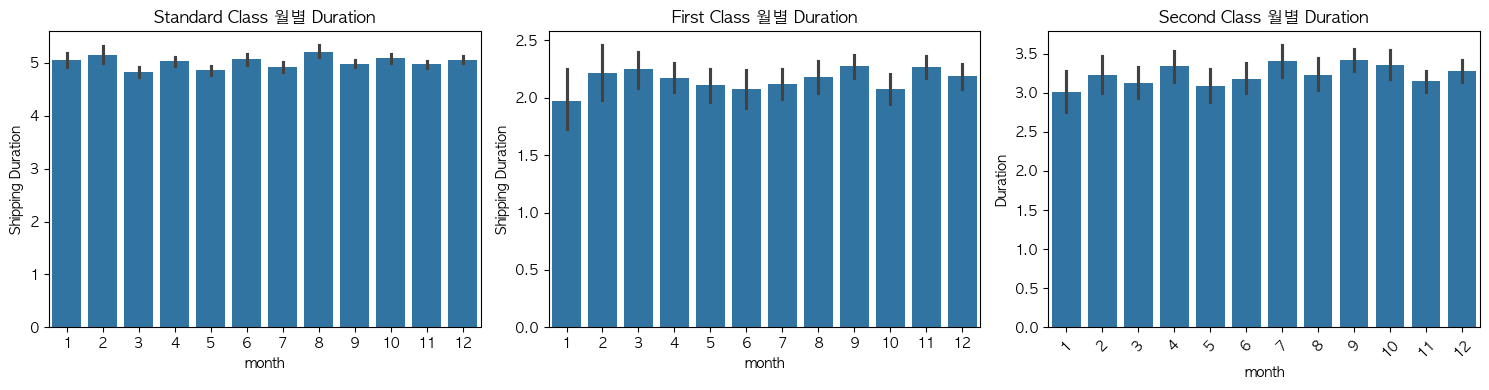

In [28]:
plt.figure(figsize=(12, 6))
fig=plt.figure(figsize=(15,4))

ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

sns.barplot(data=data[data['Ship Mode']=='Standard Class'], x='month', y='Shipping Duration', ax=ax1)
sns.barplot(data=data[data['Ship Mode']=='First Class'], x='month', y='Shipping Duration', ax=ax2)
sns.barplot(data=data[data['Ship Mode']=='Second Class'], x='month', y='Shipping Duration', ax=ax3)

# 그래프 제목과 레이블 설정
ax1.set_title('Standard Class 월별 Duration')
ax2.set_title('First Class 월별 Duration')
ax3.set_title('Second Class 월별 Duration')
plt.xlabel('month')
plt.ylabel('Duration')

# x축 레이블 회전
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

plt.show()

In [29]:
print(len(data.loc[data['Ship Mode']=='Same Day', 'unique_city'].unique()))
print(len(data.loc[data['Ship Mode']=='First Class', 'unique_city'].unique()))
print(len(data.loc[data['Ship Mode']=='Second Class', 'unique_city'].unique()))
print(len(data.loc[data['Ship Mode']=='Standard Class', 'unique_city'].unique()))
# len(data['unique_city'].unique())

133
260
304
518


In [30]:
print(len(data.loc[data['Ship Mode']=='Same Day', 'State'].unique()))
print(len(data.loc[data['Ship Mode']=='First Class', 'State'].unique()))

39
43


In [31]:
data.loc[data['State']=='District of Columbia','State'] = 'Washington'

In [32]:
len(data['State'].unique())

48

In [33]:
data['Weekday'] = data['Ship Date'].dt.dayofweek

In [38]:
print('Sat:',len(data[data['Weekday']==5].value_counts()))
print('Sun:',len(data[data['Weekday']==6].value_counts()))

Sat: 1498
Sun: 1474


In [42]:
print('Sat:',len(data[(data['Ship Mode']=='Same Day')&(data['Weekday']==5)].value_counts()))
print('Sun:',len(data[(data['Ship Mode']=='Same Day')&(data['Weekday']==6)].value_counts()))

Sat: 111
Sun: 89


In [47]:
print('City:',len(data['City'].unique()))
print('unique_city:',len(data['unique_city'].unique()))

City: 529
unique_city: 600


In [48]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Duration,lng,lat,unique_city,month,Weekday
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3,-87.533344,37.815369,"Kentucky,Henderson",11,5
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,-87.533344,37.815369,"Kentucky,Henderson",11,5
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,-118.349755,34.069966,"California,Los Angeles",6,4
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,-80.165442,26.145383,"Florida,Fort Lauderdale",10,1
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,-80.165442,26.145383,"Florida,Fort Lauderdale",10,1


In [49]:
data.to_csv('../data/0116_superstore.csv', index=False)

check = pd.read_csv('../data/0116_superstore.csv')

check.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Duration,lng,lat,unique_city,month,Weekday
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3,-87.533344,37.815369,"Kentucky,Henderson",11,5
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,-87.533344,37.815369,"Kentucky,Henderson",11,5
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,-118.349755,34.069966,"California,Los Angeles",6,4
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,-80.165442,26.145383,"Florida,Fort Lauderdale",10,1
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,-80.165442,26.145383,"Florida,Fort Lauderdale",10,1
